# PUNCH BUDDY

In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

from src.load_data import *
from src.clean_data import *

import warnings
warnings.filterwarnings('ignore')


import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

import seaborn as sb

from sklearn.model_selection import train_test_split


## How to USE
 - Move raw data folders to the /data/staging/ directory
 - Run preprocessing "process_staging" function
 - Run load_data function
 - Initialize and run RNN boi

In [2]:
process_staging()

Process Staging Data Begin
PATHS
----------------------------------------------
/Users/matthewhwang/Galvanize/fightclub/data/staging/Left Jab 100 Matt Combo RC_2019-11-05T20-19-06.646
/Users/matthewhwang/Galvanize/fightclub/data/staging/Left Jab 10 Jack_2019-11-05T16-19-57.817
/Users/matthewhwang/Galvanize/fightclub/data/staging/Right Hook 50 Matt Combo LJ_2019-11-09T14-55-19.454
/Users/matthewhwang/Galvanize/fightclub/data/staging/Left Jab 50 Egor Combo RH_2019-11-05T21-06-15.179
/Users/matthewhwang/Galvanize/fightclub/data/staging/Left Jab 200 Matt Combo RC_2019-11-09T14-06-59.036
/Users/matthewhwang/Galvanize/fightclub/data/staging/Right Hook 90 Matt Combo LH_2019-11-09T13-57-31.418
/Users/matthewhwang/Galvanize/fightclub/data/staging/Left Hook 50 Matt_2019-11-05T16-38-07.845
/Users/matthewhwang/Galvanize/fightclub/data/staging/Left Hook 10 Eric_2019-11-05T11-58-49.181
/Users/matthewhwang/Galvanize/fightclub/data/staging/Left Jab 25 Egor_2019-11-05T16-24-17.326
/Users/matthewhwang/G

Stored Left Jab 100 win8 - 11.10.2019, 01.04.30.073512 successfully
Stored Right Hook 100 win8 - 11.10.2019, 01.04.30.182203 successfully
Stored Right Cross 100 win8 - 11.10.2019, 01.04.30.406211 successfully
Stored Right Hook 50 win8 - 11.10.2019, 01.04.30.476388 successfully
Stored Left Jab 20 win8 - 11.10.2019, 01.04.30.516603 successfully
Stored Left Hook 11 win8 - 11.10.2019, 01.04.30.554258 successfully
Stored Right Cross 200 win8 - 11.10.2019, 01.04.30.818320 successfully
Stored Left Jab 25 win8 - 11.10.2019, 01.04.30.899049 successfully
Stored Right Cross 10 win8 - 11.10.2019, 01.04.30.928186 successfully
Stored Left Jab 25 win8 - 11.10.2019, 01.04.30.972459 successfully
Stored Left Jab 10 win8 - 11.10.2019, 01.04.31.036857 successfully
Stored Right Cross 25 win8 - 11.10.2019, 01.04.31.102482 successfully
Stored Left Jab 10 win8 - 11.10.2019, 01.04.31.149419 successfully
Stored Right Cross 25 win8 - 11.10.2019, 01.04.31.205455 successfully
Stored Left Hook 90 win8 - 11.10.2019,

## Move newly processed data to processed/load_data directory

In [3]:
X,y = load_data()

Load Data Begin
Completed
4162 events included


In [4]:
y.mean()

1.2551657856799616

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [6]:
BATCH_SIZE = 20
BUFFER_SIZE = 10000

In [7]:
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_data = train_data.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))
val_data = val_data.batch(BATCH_SIZE).repeat()

In [1]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(32,input_shape=X_train.shape[-2:],return_sequences=True,dropout=0.5,activation="softmax"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.LSTM(32,input_shape=X_train.shape[-2:],dropout=0.5,activation="softmax"))
model.add(tf.keras.layers.Dense(4,activation="softmax"))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

NameError: name 'tf' is not defined

In [15]:
EVALUATION_INTERVAL = 200
EPOCHS = 50
history = model.fit(train_data, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data,
                                            validation_steps=50)

Train for 200 steps, validate for 50 steps
Epoch 1/50
200/200 [==============================] - 6s 32ms/step - loss: 0.7615 - accuracy: 0.7278 - val_loss: 0.4799 - val_accuracy: 0.8870
Epoch 2/50
200/200 [==============================] - 6s 32ms/step - loss: 0.7753 - accuracy: 0.7120 - val_loss: 0.4750 - val_accuracy: 0.8930
Epoch 3/50
200/200 [==============================] - 6s 32ms/step - loss: 0.7551 - accuracy: 0.7316 - val_loss: 0.4458 - val_accuracy: 0.9310
Epoch 4/50
200/200 [==============================] - 6s 31ms/step - loss: 0.7548 - accuracy: 0.7265 - val_loss: 0.4372 - val_accuracy: 0.9330
Epoch 5/50
200/200 [==============================] - 6s 32ms/step - loss: 0.7401 - accuracy: 0.7350 - val_loss: 0.4243 - val_accuracy: 0.9460
Epoch 6/50
200/200 [==============================] - 6s 32ms/step - loss: 0.7585 - accuracy: 0.7373 - val_loss: 0.4283 - val_accuracy: 0.9480
Epoch 7/50
200/200 [==============================] - 6s 32ms/step - loss: 0.7448 - accuracy: 0.742

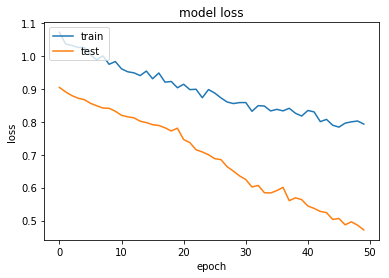

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
model.predict(X_test)

array([[0.21205431, 0.08141295, 0.6778231 , 0.02870967],
       [0.35766506, 0.35657832, 0.11621221, 0.16954432],
       [0.3539433 , 0.22146189, 0.33538264, 0.0892122 ],
       ...,
       [0.3381019 , 0.20004198, 0.3810265 , 0.08082958],
       [0.34028247, 0.38433072, 0.08239315, 0.19299364],
       [0.33213115, 0.39335158, 0.07039518, 0.20412216]], dtype=float32)

In [12]:
y_test

array([2, 1, 0, ..., 0, 1, 1])

In [18]:
type(model)

tensorflow.python.keras.engine.sequential.Sequential

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 17, 32)            4992      
_________________________________________________________________
dropout (Dropout)            (None, 17, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 4)                 132       
Total params: 13,444
Trainable params: 13,444
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.save('my_model.h5') 

In [28]:
new_model = tf.keras.models.load_model('my_model.h5')